In [1]:
using Revise

In [2]:
using LowRankVortex

┌ Info: Precompiling LowRankVortex [fdf095b8-6f21-420b-9d49-8e692abb03d1]
└ @ Base loading.jl:1423


In [3]:
using PotentialFlow

In [4]:
using Plots
pyplot()

Plots.PyPlotBackend()

### Plotting of kernels

In [5]:
Γ1, Γ2 = -1.0, 1.0
z1, z2 = -0.5+0.5im, 0.5+0.5im

(-0.5 + 0.5im, 0.5 + 0.5im)

In [3]:
dot(u1,u2) = real(u1*conj(u2))

dot (generic function with 1 method)

In [6]:
v1 = Vortex.Blob(z1,Γ1,0.1)
v2 = Vortex.Blob(z2,Γ2,0.1)
dvw1(z) = induce_velocity(z,v1,0.0)
dvw2(z) = induce_velocity(z,v2,0.0)
dvw12 = induce_velocity(v1,v2,0.0)
dvw21 = induce_velocity(v2,v1,0.0)

press11(z) = -0.5*dot(dvw1(z),dvw1(z))
press12(z) = -0.5*dot(dvw2(z),dvw2(z))
press1(z) = press11(z) + press12(z)
press2(z) = -dot(dvw1(z),dvw2(z))
press3(z) =  dot(dvw12,dvw1(z)) + dot(dvw21,dvw2(z))
press(z) = press11(z) + press12(z) + press2(z) + press3(z)

press (generic function with 1 method)

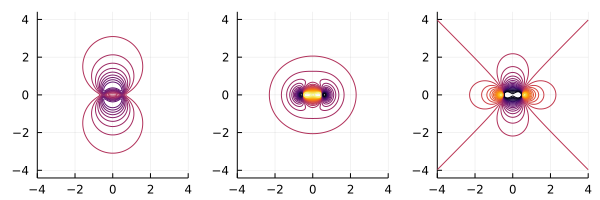

In [303]:
l = range(-0.1,0.1,length=41)
cl = (-0.1,0.1)
P11=plot(x,y,press11.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax))
P12=plot(x,y,press12.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax))

P2=plot(x,y,press2.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax))
P3=plot(x,y,press3.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax))
P23 = plot(x,y,press2.(zg)'.+ press3.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax))
    #plot(x,y,press2.(zg)' .+ press3.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),title="P2+P3"),
P=plot(x,y,press.(zg)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax))
plot(P23,P2,P3,layout=(1,3),size=(600,200))
#savefig("pressure-pointvortexpair1.pdf")

In [33]:
xmin, xmax = -4.0, 4.0
ymin, ymax = 0.0, 4.0
x = range(xmin,xmax,length=401)
y = range(ymin,ymax,length=401)
zg = x .+ im*y';

In [35]:
walltype = LowRankVortex.FlatWall

#vint_1 = vint.(zg,z2,z1);
vint_1 = LowRankVortex.Π.(zg,z2,z1,walltype=walltype);


#dvintx_1 = dvintx.(zg,z2,z1) .+ dvintx.(z2,zg,z1);
#dvinty_1 = dvinty.(zg,z2,z1) .+ dvinty.(z2,zg,z1);

dvdir_1 = LowRankVortex.dPdzv.(zg,z1,walltype=walltype)
dvdirx_1 = 2.0*real.(dvdir_1)
dvdiry_1 = -2.0*imag.(dvdir_1)

dvint_1 = LowRankVortex.dΠdzvl.(zg,z1,z2,walltype=walltype) 
dvintx_1 = 2.0*real.(dvint_1)
dvinty_1 = -2.0*imag.(dvint_1)


#dvintx_2 = dvintx.(zg,z1,z2) .+ dvintx.(z1,zg,z2);
#dvinty_2 = dvinty.(zg,z1,z2) .+ dvinty.(z1,zg,z2);

In [36]:
#dvintx_1[abs.(dvintx_1) .< 1e-9] .= 0.0;
#dvinty_1[abs.(dvinty_1) .< 1e-9] .= 0.0;

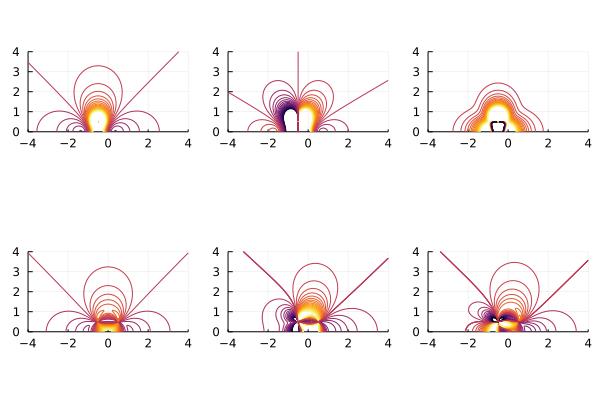

In [37]:
l = range(-0.1,0.1,length=41)
cl = (-0.1,0.1)
P2 = plot(x,y,LowRankVortex.Π.(zg,z2,z1,walltype=walltype)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax))

P3 = plot(x,y,dvintx_1',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax))
plot!(P3,x,y,dvintx_1',levels=[-1e-10,1e-10])

P4 = plot(x,y,dvinty_1',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax))
plot!(P4,x,y,dvinty_1',levels=[-1e-10,1e-10])

ly = @layout [grid(2,3)]
plot(
    plot(x,y,LowRankVortex.P.(zg,z1,walltype=walltype)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax)),
    #plot(x,y,dvdirx.(zg,z1)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax)),
    #plot(x,y,dvdiry.(zg,z1)',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax)),
    plot(x,y,dvdirx_1',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax)),
    plot(x,y,dvdiry_1',ratio=1,levels=l,clim=cl,legend=false,xlim=(xmin,xmax),ylim=(ymin,ymax)),
    P2,P3,P4,
    layout=ly,
    size=(600,400)
    )
#savefig("kernel-grads-2vortex.pdf")